In [1]:
import transformers
print(transformers.__version__)


/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.37.2


In [2]:
import llava
print("LLaVA base package imported successfully!")

from llava.model.builder import load_pretrained_model
print("load_pretrained_model imported successfully!")

from llava.mm_utils import get_model_name_from_path
print("get_model_name_from_path imported successfully!")

from llava.eval.run_llava import eval_model
print("eval_model imported successfully!")


LLaVA base package imported successfully!
load_pretrained_model imported successfully!
get_model_name_from_path imported successfully!
eval_model imported successfully!


In [3]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

print("LLaVA package imported successfully!")


LLaVA package imported successfully!


In [4]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

model_path = "liuhaotian/llava-v1.5-7b"

tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=get_model_name_from_path(model_path)
)

print("Model and tokenizer loaded successfully!")


/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.67s/it]


Model and tokenizer loaded successfully!


In [5]:
import os

# Define paths to the datasets
base_dir = os.getcwd()  # Get the current working directory
img_dir = os.path.join(base_dir, "leftImg8bit")
ann_dir = os.path.join(base_dir, "gtFine")

# Print paths to verify
print(f"Image Directory: {img_dir}")
print(f"Annotation Directory: {ann_dir}")

Image Directory: /home/jupyter-grp-kavuri/leftImg8bit
Annotation Directory: /home/jupyter-grp-kavuri/gtFine


In [6]:
# List contents of the directories
print("Images Directory Contents:")
print(os.listdir(img_dir))  # This should contain subfolders like 'train', 'val', etc.

print("\nAnnotations Directory Contents:")
print(os.listdir(ann_dir))  # This should also contain subfolders like 'train', 'val', etc.

Images Directory Contents:
['test', 'train', '.ipynb_checkpoints', 'val']

Annotations Directory Contents:
['test', 'train', '.ipynb_checkpoints', 'val']


In [7]:
import glob

# Get all image paths
image_paths = glob.glob(os.path.join(img_dir, "**", "*.png"), recursive=True)

# Display sample and count
print(f"Number of Images: {len(image_paths)}")
print(f"Sample Image Path: {image_paths[0] if image_paths else 'No images found!'}")

# Get all annotation paths
annotation_paths = glob.glob(os.path.join(ann_dir, "**", "*.json"), recursive=True)

# Display sample and count
print(f"Number of Annotations: {len(annotation_paths)}")
print(f"Sample Annotation Path: {annotation_paths[0] if annotation_paths else 'No annotations found!'}")


Number of Images: 5000
Sample Image Path: /home/jupyter-grp-kavuri/leftImg8bit/test/bonn/bonn_000000_000019_leftImg8bit.png
Number of Annotations: 4831
Sample Annotation Path: /home/jupyter-grp-kavuri/gtFine/test/bonn/bonn_000032_000019_gtFine_polygons.json


In [8]:
# Inspect subfolder contents
train_img_dir = os.path.join(img_dir, "train")
train_ann_dir = os.path.join(ann_dir, "train")

# Listing subfolder contents
print("Training Images Subfolder Contents:")
print(os.listdir(train_img_dir))  # Should list city names like 'aachen', 'bochum', etc.

print("\nTraining Annotations Subfolder Contents:")
print(os.listdir(train_ann_dir))  # Should list city names like 'aachen', 'bochum', etc.


Training Images Subfolder Contents:
['zurich', 'krefeld', 'monchengladbach', 'stuttgart', 'hanover', 'darmstadt', 'aachen', 'jena', 'hamburg', 'erfurt', 'bochum', 'dusseldorf', 'weimar', 'ulm', '.ipynb_checkpoints', 'strasbourg', 'bremen', 'tubingen', 'cologne']

Training Annotations Subfolder Contents:
['zurich', 'krefeld', 'monchengladbach', 'stuttgart', 'hanover', 'darmstadt', 'aachen', 'jena', 'hamburg', 'erfurt', 'bochum', 'dusseldorf', 'weimar', 'ulm', '.ipynb_checkpoints', 'strasbourg', 'bremen', 'tubingen', 'cologne']


In [9]:

# List the files in the 'train' directories
print("Images train directory files:", os.listdir(train_img_dir)[:5])  # List first 5 image directories
print("Annotations train directory files:", os.listdir(train_ann_dir )[:5])  # List first 5 annotation files

Images train directory files: ['zurich', 'krefeld', 'monchengladbach', 'stuttgart', 'hanover']
Annotations train directory files: ['zurich', 'krefeld', 'monchengladbach', 'stuttgart', 'hanover']


In [10]:
# Choose one city directory to explore, e.g., 'ulm'
city = 'hamburg'

# Define paths for the city-specific image and annotation directories
image_city_dir = os.path.join(train_img_dir, city)
ann_city_dir = os.path.join(train_ann_dir, city)

# List the files in the city directories
print(f"Images directory for {city}:", os.listdir(image_city_dir)[:5])  # List first 5 image files
print(f"Annotations directory for {city}:", os.listdir(ann_city_dir)[:5])  # List first 5 annotation files

Images directory for hamburg: ['hamburg_000000_080878_leftImg8bit.png', 'hamburg_000000_105724_leftImg8bit.png', 'hamburg_000000_077756_leftImg8bit.png', 'hamburg_000000_088197_leftImg8bit.png', 'hamburg_000000_024251_leftImg8bit.png']
Annotations directory for hamburg: ['hamburg_000000_096624_gtFine_labelIds.png', 'hamburg_000000_091155_gtFine_polygons.json', 'hamburg_000000_024251_gtFine_polygons.json', 'hamburg_000000_054220_gtFine_labelIds.png', 'hamburg_000000_041667_gtFine_color.png']


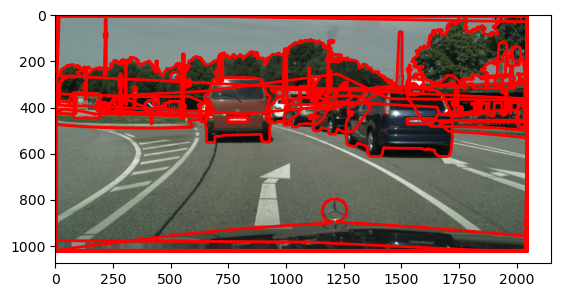

In [11]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np # Import the NumPy library with the alias 'np'

def load_cityscapes_data(train_img_dir, train_ann_dir, city, image_name):
    """
    Load the Cityscapes image and annotation data based on the image_name from a specific city.

    Args:
    - train_img_dir: Path to the directory containing images (leftImg8bit).
    - train_ann_dir: Path to the directory containing annotation files (gtFine).
    - city: The city to look for in the directory.
    - image_name: Name of the image file (without extension).

    Returns:
    - image: The image as a numpy array.
    - annotations: List of annotations for objects in the image.
    """
    # Define paths to the image and annotation files
    image_path = os.path.join(train_img_dir, city, f"{image_name}_leftImg8bit.png")
    json_path = os.path.join(train_ann_dir, city, f"{image_name}_gtFine_polygons.json")

    # Check if the image and annotation files exist
    if not os.path.exists(image_path) or not os.path.exists(json_path):
        print(f"Error: {image_name}_leftImg8bit.png or {image_name}_gtFine_polygons.json not found.")
        return None, None

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Load JSON annotations
    with open(json_path, 'r') as f:
        annotations = json.load(f)

    return image, annotations

def visualize_annotations(image, annotations):
    """
    Visualize the image along with its bounding box annotations.

    Args:
    - image: The image to display.
    - annotations: The annotations (bounding boxes, polygons, etc.).
    """
    # Display the image
    plt.imshow(image)

    # Assuming annotations contain 'objects' with bounding boxes or polygons
    for annotation in annotations['objects']:
        if 'polygon' in annotation:  # Check if the annotation contains polygon data
            polygon = annotation['polygon']
            poly_points = [(pt[0], pt[1]) for pt in polygon]
            poly_points.append(poly_points[0])  # Close the polygon loop
            poly_points = np.array(poly_points)
            plt.plot(poly_points[:, 0], poly_points[:, 1], color='red', linewidth=2)

    plt.show()

# Example usage
city = 'hamburg'
image_name = 'hamburg_000000_000629'  # Use a known image name
image, annotations = load_cityscapes_data(train_img_dir, train_ann_dir, city, image_name)

# Visualize the image with annotations
if image is not None and annotations is not None:
    visualize_annotations(image, annotations)


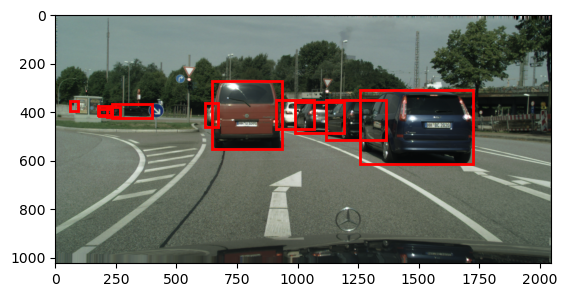

Bounding boxes for cars: [(61, 352, 94, 394), (175, 376, 228, 410), (181, 385, 233, 417), (214, 380, 265, 418), (234, 365, 401, 424), (619, 361, 672, 462), (912, 349, 1066, 467), (646, 270, 934, 551), (991, 356, 1191, 484), (1116, 349, 1367, 516), (1259, 309, 1723, 612)]


In [12]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

def extract_bounding_box_from_polygon(polygon):
    """
    Extract the bounding box from a polygon by finding the min and max x and y coordinates.

    Args:
    - polygon: A list of points representing the polygon.

    Returns:
    - (left, top, right, bottom): Coordinates of the bounding box.
    """
    polygon = np.array(polygon)
    min_x, min_y = polygon.min(axis=0)  # Find the min x and y coordinates
    max_x, max_y = polygon.max(axis=0)  # Find the max x and y coordinates

    return min_x, min_y, max_x, max_y

def extract_car_bounding_boxes(image, annotations):
    """
    Extract bounding boxes for 'car' objects in the image.

    Args:
    - image: The image to display.
    - annotations: The annotations containing objects with their labels and polygons.

    Returns:
    - A list of bounding boxes for the 'car' objects.
    """
    car_bboxes = []
    plt.imshow(image)

    # Iterate through each object in the annotation data
    for annotation in annotations['objects']:
        if 'polygon' in annotation and 'label' in annotation:
            # Check if the object is a car
            if annotation['label'] == 'car':  # Assuming the label for car is 'car'
                polygon = annotation['polygon']

                # Extract the bounding box from the polygon
                min_x, min_y, max_x, max_y = extract_bounding_box_from_polygon(polygon)
                car_bboxes.append((min_x, min_y, max_x, max_y))

                # Draw the bounding box for the car
                plt.gca().add_patch(plt.Rectangle(
                    (min_x, min_y), max_x - min_x, max_y - min_y,
                    fill=False, edgecolor='red', linewidth=2
                ))

    # Show the image with bounding boxes for cars
    plt.show()

    return car_bboxes

# Example usage
city = 'hamburg'
image_name = 'hamburg_000000_000629'  # Use a known image name
image, annotations = load_cityscapes_data(train_img_dir, train_ann_dir, city, image_name)

# Visualize the bounding boxes for 'car' objects
if image is not None and annotations is not None:
    car_bboxes = extract_car_bounding_boxes(image, annotations)
    print("Bounding boxes for cars:", car_bboxes)


In [13]:
# Example image from Cityscapes dataset
sample_image_file = "leftImg8bit/train/hamburg/hamburg_000000_000629_leftImg8bit.png"

# Text prompt for the basic task (querying for 'car')
prompt = " Provide the bounding box coordinates for the red van in the image."
model_path = "liuhaotian/llava-v1.5-7b"
# Define arguments
args = type('Args', (), {
    "model_path": model_path,
    "model_base": None,
    "model_name": get_model_name_from_path(model_path),
    "query": prompt,
    "conv_mode": None,  # If you are not using conversational mode
    "image_file": sample_image_file,
    "sep": ",",
    "temperature": 0,  # Control randomness
    "top_p": None,
    "num_beams": 1,  # Number of beams for beam search
    "max_new_tokens": 512  # Max tokens to generate for the query
})()
# Run the model evaluation (inference)
eval_model(args)

/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]
/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/ece740/kavuri/LLaVA/llava/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. 

[0.3, 0.39, 0.48, 0.52]


Image size: width=2048, height=1024
Normalized coordinates: [0.3, 0.26, 0.48, 0.52]
Scaled coordinates: x_min=614, y_min=266, x_max=983, y_max=532


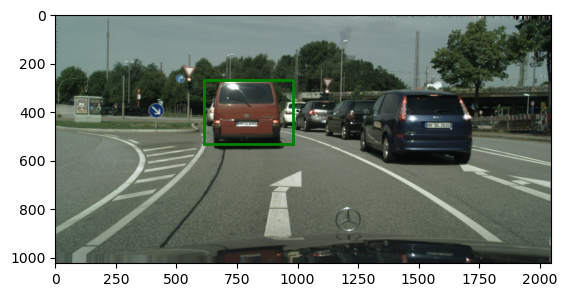

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

sample_image_file = "leftImg8bit/train/hamburg/hamburg_000000_000629_leftImg8bit.png"  # Replace with your image path
image = cv2.imread(sample_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Coordinates (normalized) for the van (Make sure this is correct)
normalized_coords = [0.3, 0.26, 0.48, 0.52]  # [x_min, y_min, x_max, y_max]

# Get the image dimensions (height and width)
height, width, _ = image.shape

# Convert normalized coordinates to pixel values
x_min = int(normalized_coords[0] * width)
y_min = int(normalized_coords[1] * height)
x_max = int(normalized_coords[2] * width)
y_max = int(normalized_coords[3] * height)

# Print the coordinates to debug
print(f"Image size: width={width}, height={height}")
print(f"Normalized coordinates: {normalized_coords}")
print(f"Scaled coordinates: x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}")

# Create figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch (bounding box)
rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='g', facecolor='none')

# Add the bounding box to the image
ax.add_patch(rect)

# Show the image with the bounding box
plt.show()


In [15]:
# Example image from Cityscapes dataset
sample_image_file = "leftImg8bit/train/dusseldorf/dusseldorf_000008_000019_leftImg8bit.png"

# Text prompt for the basic task (querying for 'car')
prompt = " Provide bounding box coordinates for the cyclist."
model_path = "liuhaotian/llava-v1.5-7b"
# Define arguments
args = type('Args', (), {
    "model_path": model_path,
    "model_base": None,
    "model_name": get_model_name_from_path(model_path),
    "query": prompt,
    "conv_mode": None,  # If you are not using conversational mode
    "image_file": sample_image_file,
    "sep": ",",
    "temperature": 0,  # Control randomness
    "top_p": None,
    "num_beams": 1,  # Number of beams for beam search
    "max_new_tokens": 512  # Max tokens to generate for the query
})()
# Run the model evaluation (inference)
eval_model(args)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]


[0.48, 0.44, 0.52, 0.5]


Image size: width=2048, height=1024
Normalized coordinates: [0.45, 0.39, 0.52, 0.5]
Scaled coordinates: x_min=921, y_min=399, x_max=1064, y_max=512


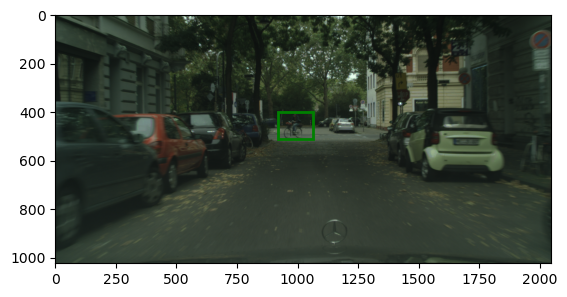

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

sample_image_file = "leftImg8bit/train/dusseldorf/dusseldorf_000008_000019_leftImg8bit.png"  # Replace with your image path
image = cv2.imread(sample_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Coordinates (normalized) for the van (Make sure this is correct)
normalized_coords = [0.45, 0.39, 0.52, 0.5]  # [x_min, y_min, x_max, y_max]

# Get the image dimensions (height and width)
height, width, _ = image.shape

# Convert normalized coordinates to pixel values
x_min = int(normalized_coords[0] * width)
y_min = int(normalized_coords[1] * height)
x_max = int(normalized_coords[2] * width)
y_max = int(normalized_coords[3] * height)

# Print the coordinates to debug
print(f"Image size: width={width}, height={height}")
print(f"Normalized coordinates: {normalized_coords}")
print(f"Scaled coordinates: x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}")

# Create figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch (bounding box)
rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='g', facecolor='none')

# Add the bounding box to the image
ax.add_patch(rect)

# Show the image with the bounding box
plt.show()


In [17]:
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [18]:
'''
import os
import glob

def process_folder(image_dir, annotation_dir, output_dir, target_class):
   
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all images in the folder
    for image_file in glob.glob(os.path.join(image_dir, "*.png")):
        # Extract the base filename (without extension)
        base_name = os.path.basename(image_file).replace("_leftImg8bit.png", "")

        # Construct the corresponding annotation file path
        annotation_file = os.path.join(annotation_dir, base_name + "_gtFine_polygons.json")

        if os.path.exists(annotation_file):
            print(f"Processing: {image_file}")
            crop_patches(image_file, annotation_file, output_dir, target_class)
        else:
            print(f"Annotation file not found for: {image_file}")

# Example usage for folder processing
image_dir = "leftImg8bit/train/hamburg"  # Folder containing images
annotation_dir = "gtFine/train/hamburg"  # Folder containing annotation JSON files
output_patch_dir = "output_patches"  # Directory to save patches
target_class = "car"  # Replace with the desired class

process_folder(image_dir, annotation_dir, output_patch_dir, target_class)
'''

'\nimport os\nimport glob\n\ndef process_folder(image_dir, annotation_dir, output_dir, target_class):\n   \n    \n    # Ensure the output directory exists\n    os.makedirs(output_dir, exist_ok=True)\n\n    # Loop through all images in the folder\n    for image_file in glob.glob(os.path.join(image_dir, "*.png")):\n        # Extract the base filename (without extension)\n        base_name = os.path.basename(image_file).replace("_leftImg8bit.png", "")\n\n        # Construct the corresponding annotation file path\n        annotation_file = os.path.join(annotation_dir, base_name + "_gtFine_polygons.json")\n\n        if os.path.exists(annotation_file):\n            print(f"Processing: {image_file}")\n            crop_patches(image_file, annotation_file, output_dir, target_class)\n        else:\n            print(f"Annotation file not found for: {image_file}")\n\n# Example usage for folder processing\nimage_dir = "leftImg8bit/train/hamburg"  # Folder containing images\nannotation_dir = "gtFin

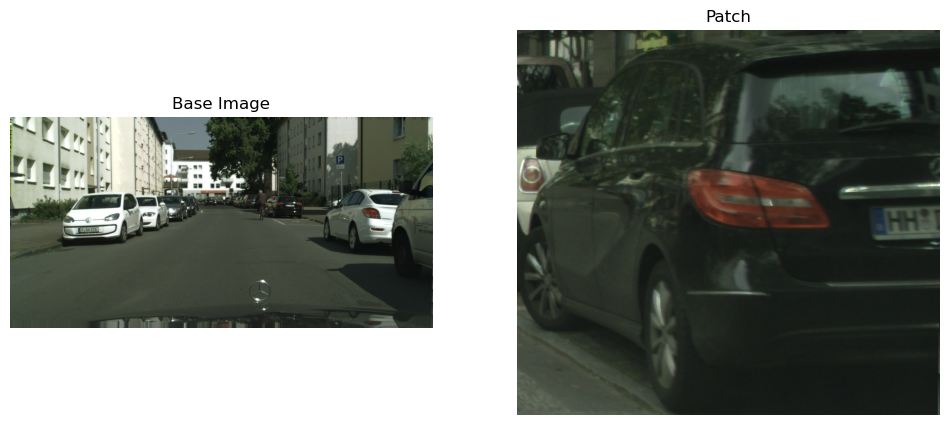

In [19]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths (replace with your actual paths)
base_image_path = "leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png"  # Example base image
patch_image_path = "output_patches/car_patch_23.png"  # Example patch

# Load the base image and patch
base_image = cv2.imread(base_image_path)
patch = cv2.imread(patch_image_path)

# Convert to RGB for display (OpenCV loads images in BGR format)
base_image_rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
patch_rgb = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(base_image_rgb)
plt.title("Base Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(patch_rgb)
plt.title("Patch")
plt.axis("off")

plt.show()


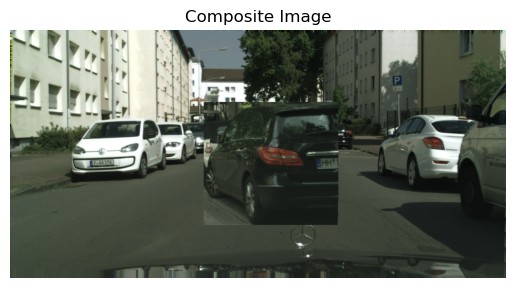

In [20]:
def place_patch(base_image, patch, position):
    """
    Places a patch on the base image at a given position.
    
    Args:
        base_image (numpy array): The base image.
        patch (numpy array): The patch to place.
        position (tuple): (x, y) coordinates for the top-left corner of the patch.
    
    Returns:
        numpy array: The composite image.
    """
    x, y = position
    h, w, _ = patch.shape
    base_copy = base_image.copy()

    # Place the patch
    base_copy[y:y + h, x:x + w] = patch
    return base_copy

# Example placement (adjust x and y as needed)
x, y = 800, 300  # Top-left corner of where the patch will be placed
composite_image = place_patch(base_image, patch, (x, y))

# Display the composite image
composite_image_rgb = cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB)
plt.imshow(composite_image_rgb)
plt.title("Composite Image")
plt.axis("off")
plt.show()


In [21]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

# Load the pretrained model
model_path = "liuhaotian/llava-v1.5-7b"  # Replace with your specific model if needed
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=get_model_name_from_path(model_path)
)

# Function to predict bounding box
def predict_bounding_box(image_path, prompt):
    """
    Predicts bounding box using LLaVA model.
    
    Args:
        image_path (str): Path to the input image.
        prompt (str): Text prompt describing the object and placement.
    
    Returns:
        tuple: Normalized bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Prepare args for evaluation
    args = type('Args', (), {
        "model_path": model_path,
        "model_base": None,
        "model_name": get_model_name_from_path(model_path),
        "query": prompt,
        "conv_mode": None,
        "image_file": image_path,
        "sep": ",",
        "temperature": 0,
        "top_p": None,
        "num_beams": 1,
        "max_new_tokens": 512
    })()

    # Run the model
    response = eval_model(args)
    print("Model Response:", response)

    # Handle NoneType response
    if response is None:
        print("Error: Model did not generate a valid response.")
        return None

    # Extract bounding box coordinates from the response
    try:
        coordinates = [float(num) for num in response.split(",")]
        return tuple(coordinates)
    except ValueError:
        print("Error: Unable to parse response into bounding box coordinates.")
        return None

# Example usage
image_path = "leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png"  # Input image
prompt = "Find the largest car in the scene"  # Example prompt

# Predict the bounding box
bbox = predict_bounding_box(image_path, prompt)

if bbox:
    # Convert normalized coordinates to pixel values
    img_width, img_height = 2048, 1024  # Replace with actual image dimensions
    x_min = int(bbox[0] * img_width)
    y_min = int(bbox[1] * img_height)
    x_max = int(bbox[2] * img_width)
    y_max = int(bbox[3] * img_height)

    print(f"Bounding Box (in pixels): x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}")
else:
    print("Bounding box prediction failed.")


You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.48s/it]
You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]


The largest car in the scene is a white car parked on the side of the street.
Model Response: None
Error: Model did not generate a valid response.
Bounding box prediction failed.


In [22]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolov5su.pt")

# Run inference on the image
results = model("leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png")

# Extract bounding boxes for the "car" class
for result in results[0].boxes:  # Use 'boxes' directly as it contains detected boxes
    x_min, y_min, x_max, y_max = result.xyxy[0]  # Coordinates in xyxy format
    confidence = result.conf[0]  # Confidence score
    class_id = result.cls[0]  # Class ID

    if class_id == 2:  # Class 2 corresponds to "car" in COCO dataset
        print(f"Car detected: [x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}], Confidence: {confidence}")



image 1/1 /home/jupyter-grp-kavuri/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png: 320x640 1 person, 1 bicycle, 10 cars, 259.3ms
Speed: 2.3ms preprocess, 259.3ms inference, 23.6ms postprocess per image at shape (1, 3, 320, 640)
Car detected: [x_min=1514.1439208984375, y_min=351.0442810058594, x_max=1927.9349365234375, y_max=651.14501953125], Confidence: 0.9096986651420593
Car detected: [x_min=248.0070037841797, y_min=367.3664245605469, x_max=647.9658203125, y_max=624.9669799804688], Confidence: 0.903384804725647
Car detected: [x_min=610.337890625, y_min=380.9789733886719, x_max=773.1676025390625, y_max=554.0848999023438], Confidence: 0.8710502982139587
Car detected: [x_min=1244.3939208984375, y_min=382.91973876953125, x_max=1419.201171875, y_max=496.4151306152344], Confidence: 0.8043822646141052
Car detected: [x_min=1843.1734619140625, y_min=208.4884490966797, x_max=2046.2109375, y_max=784.2191772460938], Confidence: 0.8002082109451294
Car detected: [x_min=726.47473

In [23]:
confidence_threshold = 0.5  # Set your threshold here

for result in results[0].boxes:  
    x_min, y_min, x_max, y_max = result.xyxy[0]  
    confidence = result.conf[0]  
    class_id = result.cls[0]

    if class_id == 2 and confidence >= confidence_threshold:  # Only process "car" class with high confidence
        print(f"Car detected: [x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}], Confidence: {confidence}")


Car detected: [x_min=1514.1439208984375, y_min=351.0442810058594, x_max=1927.9349365234375, y_max=651.14501953125], Confidence: 0.9096986651420593
Car detected: [x_min=248.0070037841797, y_min=367.3664245605469, x_max=647.9658203125, y_max=624.9669799804688], Confidence: 0.903384804725647
Car detected: [x_min=610.337890625, y_min=380.9789733886719, x_max=773.1676025390625, y_max=554.0848999023438], Confidence: 0.8710502982139587
Car detected: [x_min=1244.3939208984375, y_min=382.91973876953125, x_max=1419.201171875, y_max=496.4151306152344], Confidence: 0.8043822646141052
Car detected: [x_min=1843.1734619140625, y_min=208.4884490966797, x_max=2046.2109375, y_max=784.2191772460938], Confidence: 0.8002082109451294
Car detected: [x_min=726.4747314453125, y_min=381.23358154296875, x_max=858.8997192382812, y_max=509.0347595214844], Confidence: 0.7864534258842468
Car detected: [x_min=1111.36279296875, y_min=375.37158203125, x_max=1198.5277099609375, y_max=449.7188415527344], Confidence: 0.54

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png")

# Draw bounding boxes
for result in results[0].boxes:
    x_min, y_min, x_max, y_max = result.xyxy[0]
    confidence = result.conf[0]
    class_id = result.cls[0]

    if class_id == 2 and confidence >= confidence_threshold:
        # Draw rectangle around the car
        cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(img, f'Car: {confidence:.2f}', (int(x_min), int(y_min)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
cv2.imshow("Detected Cars", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
